# COGS 108 - Final Project

## Important

- ONE, and only one, member of your group should upload this notebook to TritonED. 
- Each member of the group will receive the same grade on this assignment. 
- Keep the file name the same: submit the file 'FinalProject.ipynb'.
- Only upload the .ipynb file to TED, do not upload any associted data. Make sure that for cells in which you want graders to see output that these cells have been executed.

## Group Members: Fill in the Student IDs of each group member here

Replace the lines below to list each persons full student ID, ucsd email and full name.

-  A14947178 - jmcdouga@ucsd.edu - James Ian McDougall Jr.
- 
- 
- 



# Part 0 - Importing the required packages

In [92]:
import pandas as pd # for use of dataframes
import numpy as np
import matplotlib.pyplot as plt # for plotting graphs 
import seaborn as sns
import statsmodels.api as sm # for fitting an OLS model
import scipy.stats as stats # for access to tests for normal distribution
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind, normaltest # for access to t tests, normal test
%matplotlib inline

# Part 1 - Introduction and Background

Chicago, otherwise known as 'The Windy City', has some of the worst crime rates in America. Some of this has to do with statitical flukes; it is the third largest city in the U.S., which makes any type of criminal activity more easily reportable. However, most people wouldn't argue over the real danger you are in when you go to some of the worse off areas of Chicago.

We wanted to analyze the crime rates in Chicago in some way in order to assist people in the city in understanding what problems exist and where they are happening. In the end, we decided to ask the following question:

"Does the district a crime is committed in or type of crime more closely predict whether an arrest was made".

The answers derived from the answer to this question could spawn further analysis, e.g.:

1. If a particular crime is more likely to result in an arrest in one district over the other, why is that? Is it the police in that district? Is it the citizens? Or is it the geography?

2. If the type of crime affects whether an arrest is made, does that mean that we are more afraid of certain crimes over others? Is this a valid fear? 

# Part 2 - Data Description

We are using this dataset: https://www.kaggle.com/chicago/chicago-crime

This is chicago crime data from 2001 to present. It represents all reported instances of crime, and whether or not an arrest has been made since the data was last released. Each row represents a crime, except for multiple homicides, for which there is a different row for each victim of the crime. 

Here are some basic stats:

In [93]:
crime =pd.read_csv('~/data/chicago_crime_data.csv')

In [94]:
crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,28.0,25.0,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


In [95]:
crime.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,6.802359e+06,6.802359e+06,6.802312e+06,6.187505e+06,6.188828e+06,6.740394e+06,6.740394e+06,6.802359e+06,6.740394e+06,6.740394e+06
mean,6.267879e+06,1.191551e+03,1.130251e+01,2.268313e+01,3.758620e+01,1.164517e+06,1.885721e+06,2.008401e+03,4.184201e+01,-8.767180e+01
std,3.063983e+06,7.033569e+02,6.945669e+00,1.383246e+01,2.154045e+01,1.716683e+04,3.270468e+04,5.067564e+00,8.999481e-02,6.212430e-02
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,3.443594e+06,6.220000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152934e+06,1.859189e+06,2.004000e+03,4.176892e+01,-8.771387e+01
50%,6.254311e+06,1.111000e+03,1.000000e+01,2.200000e+01,3.200000e+01,1.165991e+06,1.890586e+06,2.008000e+03,4.185537e+01,-8.766618e+01
75%,8.909085e+06,1.731000e+03,1.700000e+01,3.400000e+01,5.800000e+01,1.176352e+06,1.909313e+06,2.012000e+03,4.190686e+01,-8.762836e+01
max,1.158934e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.019000e+03,4.202291e+01,-8.752453e+01


In [96]:
print('Total Number of Crimes:\t\t\t{0}'.format(len(crime)))
print('Total number of Unique Districts:\t{0}'.format(len(crime['District'].unique())))

Total Number of Crimes:			6802359
Total number of Unique Districts:	25


# Part 3 - Data Cleaning and Preprocessing

This data is fairly clean, because it is maintained by the Chicago Police Department, which has high organizational standards. There aren't very many invalid crimes or unknowns.

To clean the data, we will do the following (not necessarily in order):

1. Drop useless columns and columns that invade privacy
2. Standardize the location description
3. Standardize the crime type to get rid of the uppercase, standardize the non-criminal type
4. Remove NaN values

In [97]:
# first, drop the location description column and community area column because of privacy concerns 
crime = crime.drop(['Location Description', 'Block', 'Community Area','Latitude', 'Beat', 'Ward','Longitude','X Coordinate','Y Coordinate','Location','Ward'],axis=1)

In [98]:
crime.head()

,ID,Case Number,Date,IUCR,Primary Type,Description,Arrest,Domestic,District,FBI Code,Year,Updated On
0,10000092,HY189866,03/18/2015 07:44:00 PM,041A,BATTERY,AGGRAVATED: HANDGUN,False,False,11.0,04B,2015,02/10/2018 03:50:01 PM
1,10000094,HY190059,03/18/2015 11:00:00 PM,4625,OTHER OFFENSE,PAROLE VIOLATION,True,False,7.0,26,2015,02/10/2018 03:50:01 PM
2,10000095,HY190052,03/18/2015 10:45:00 PM,0486,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,2.0,08B,2015,02/10/2018 03:50:01 PM
3,10000096,HY190054,03/18/2015 10:30:00 PM,0460,BATTERY,SIMPLE,False,False,2.0,08B,2015,02/10/2018 03:50:01 PM
4,10000097,HY189976,03/18/2015 09:00:00 PM,031A,ROBBERY,ARMED: HANDGUN,False,False,11.0,03,2015,02/10/2018 03:50:01 PM


In [99]:
"""
    Author: James McDougall
    Param: string - is the string which is the name of the Primary Type
    Returns: a variable of type str which is lower case and represents  a more standardized type
"""
def standardize_primary_type(string):
    # compile all non-criminal offenses into on label
    if string == 'NON-CRIMINAL (SUBJECT SPECIFIED)' or string == 'NON - CRIMINAL' or string == 'NON-CRIMINAL':
        return 'non-criminal'
    if string == 'OTHER OFFENSE':
        return 'other'
    # rename crim sexual assault to just sexual assault to make it easier to read
    if string == 'CRIM SEXUAL ASSAULT':
        return 'sexual assault'
    else:
        # everything else, make sure to lowercase it so we don't have to use caps lock lol
        return string.lower()
        

In [100]:
to_drop = crime[ crime['District'].isnull()]
print('Number of rows to drop with NaN district: ' + str(len(to_drop)))
crime = crime.drop(to_drop.index,axis=0)

to_drop = crime[crime['Primary Type'].isnull()]
print('Number of row to drop with NaN Primary Type: ' + str(len(to_drop)))
crime = crime.drop(to_drop.index,axis=0)

Number of rows to drop with NaN district: 47
Number of row to drop with NaN Primary Type: 0


In [101]:
crime['Type'] = crime['Primary Type'].apply(standardize_primary_type)
crime['District'] = crime['District'].astype(str)

def arrest_to_int(string):
    if string == True:
        return 1
    elif string == False:
        return 0
crime['Arrest'] = crime['Arrest'].apply(arrest_to_int)


Additionally, we must drop all rows that are in district 31 because this district is not on the main chicago police page, so it is either nonexistant or far enough away from the main Chicago city to not be relevant to our analysis.

In [75]:
crime = crime[crime['District'] != '31']
assert '31' not in crime['District'].unique()

In [102]:
crime.head()

,ID,Case Number,Date,IUCR,Primary Type,Description,Arrest,Domestic,District,FBI Code,Year,Updated On,Type
0,10000092,HY189866,03/18/2015 07:44:00 PM,041A,BATTERY,AGGRAVATED: HANDGUN,0,False,11.0,04B,2015,02/10/2018 03:50:01 PM,battery
1,10000094,HY190059,03/18/2015 11:00:00 PM,4625,OTHER OFFENSE,PAROLE VIOLATION,1,False,7.0,26,2015,02/10/2018 03:50:01 PM,other
2,10000095,HY190052,03/18/2015 10:45:00 PM,0486,BATTERY,DOMESTIC BATTERY SIMPLE,0,True,2.0,08B,2015,02/10/2018 03:50:01 PM,battery
3,10000096,HY190054,03/18/2015 10:30:00 PM,0460,BATTERY,SIMPLE,0,False,2.0,08B,2015,02/10/2018 03:50:01 PM,battery
4,10000097,HY189976,03/18/2015 09:00:00 PM,031A,ROBBERY,ARMED: HANDGUN,0,False,11.0,03,2015,02/10/2018 03:50:01 PM,robbery


# Part 4 - Data Visualization

First, let's take a look at the data that we have immediately at our hands by seeing the graph of how many of each type of crimes have been reported to and documented by the Chicago Police Department. 

<BarContainer object of 33 artists>

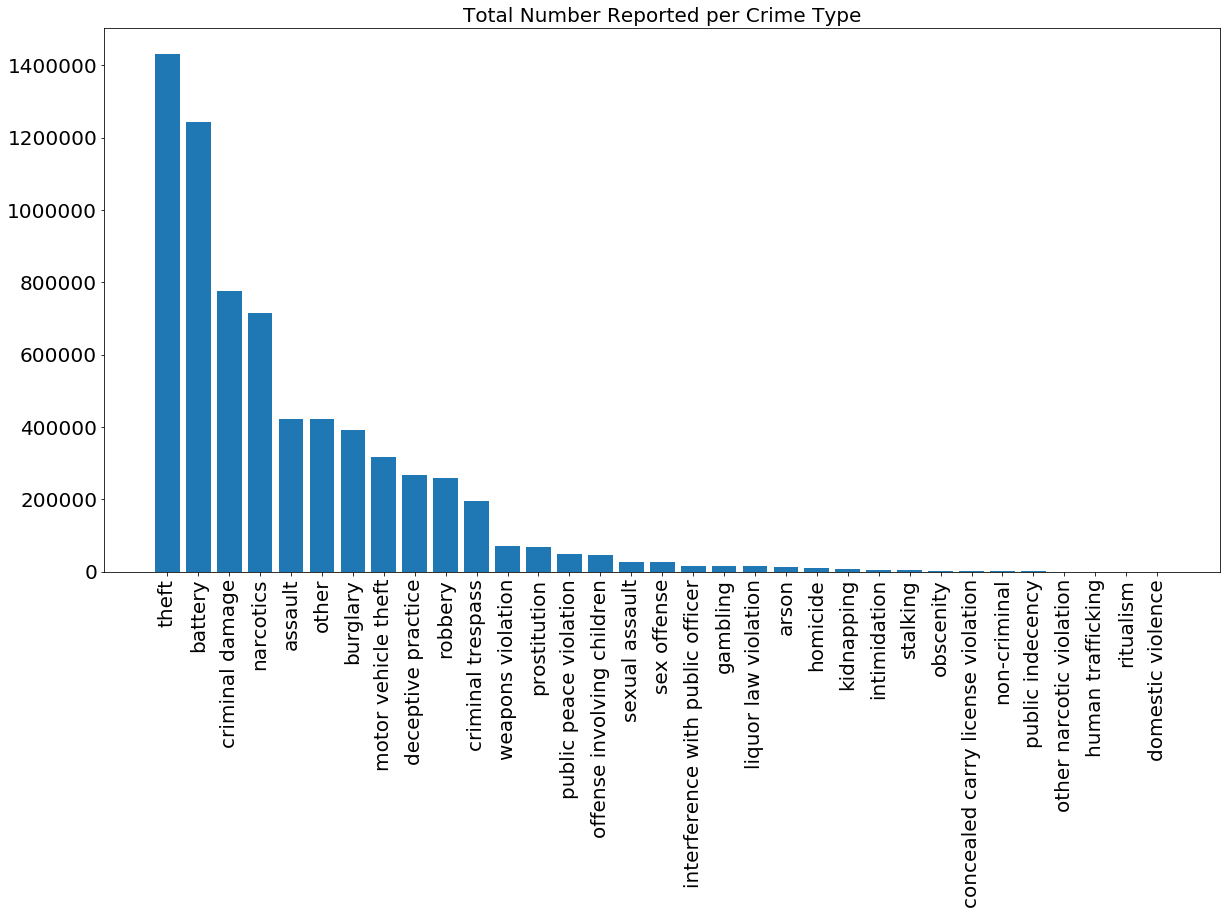

In [103]:
plt.figure(figsize=(20,10))
crimeType = plt.bar(crime.Type.value_counts().index, crime.Type.value_counts())
plt.title('Total Number Reported per Crime Type', fontsize='20')
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=20)
crimeType

From the above graph, we can see that certain crime types are reported and/or occur much more frequently than others (the top 3 being theft, battery, and narcotics). Now that we can see which crimes are reported the most, let's dive deeper and see how many total crimes are reported in each district.

In [104]:
districts = crime['District'].unique()
district_cache = {}
arrest_cache = {}
ratio_cache = {}
for district in districts:
    district_cache[district] = len(crime[ crime['District'] == district ]) #gets total num of crimes in each district
    arrest_cache[district] = len(crime[ (crime['Arrest'] == True) & (crime['District'] == district)]) #gets total num of arrests per district
    ratio_cache[district] = arrest_cache[district] / district_cache[district] #gets the ratio of arrests per crime in each district 
print(district_cache)
print(arrest_cache)
print(ratio_cache)

{'11.0': 435546, '7.0': 401437, '2.0': 322883, '9.0': 337799, '5.0': 301539, '6.0': 392059, '4.0': 385556, '12.0': 333235, '15.0': 296599, '14.0': 268222, '1.0': 265685, '20.0': 118627, '10.0': 291161, '22.0': 222847, '8.0': 462519, '17.0': 197248, '3.0': 345487, '18.0': 299954, '16.0': 225217, '25.0': 392484, '24.0': 202763, '19.0': 303257, '31.0': 184, '21.0': 4}
{'11.0': 189314, '7.0': 116609, '2.0': 91068, '9.0': 98751, '5.0': 79592, '6.0': 106395, '4.0': 90690, '12.0': 82367, '15.0': 124022, '14.0': 57280, '1.0': 77579, '20.0': 29342, '10.0': 95476, '22.0': 48823, '8.0': 110684, '17.0': 43461, '3.0': 94195, '18.0': 74794, '16.0': 43743, '25.0': 111791, '24.0': 48105, '19.0': 68804, '31.0': 70, '21.0': 2}
{'11.0': 0.4346590256827063, '7.0': 0.29047895435647436, '2.0': 0.2820464378737809, '9.0': 0.29233656701174365, '5.0': 0.2639525898805793, '6.0': 0.2713749716241688, '4.0': 0.23521874902737863, '12.0': 0.24717391630531008, '15.0': 0.41814706050930717, '14.0': 0.21355444370707846, 

In [105]:
districtsTotalCrime = pd.DataFrame.from_dict(district_cache, orient='index')
districtsTotalCrime.columns = ['Total Crimes Reported']
districtsTotalCrime.index.name = 'District Number'
districtsTotalCrime.head()

,Total Crimes Reported
District Number,
11.0,435546
7.0,401437
2.0,322883
9.0,337799
5.0,301539


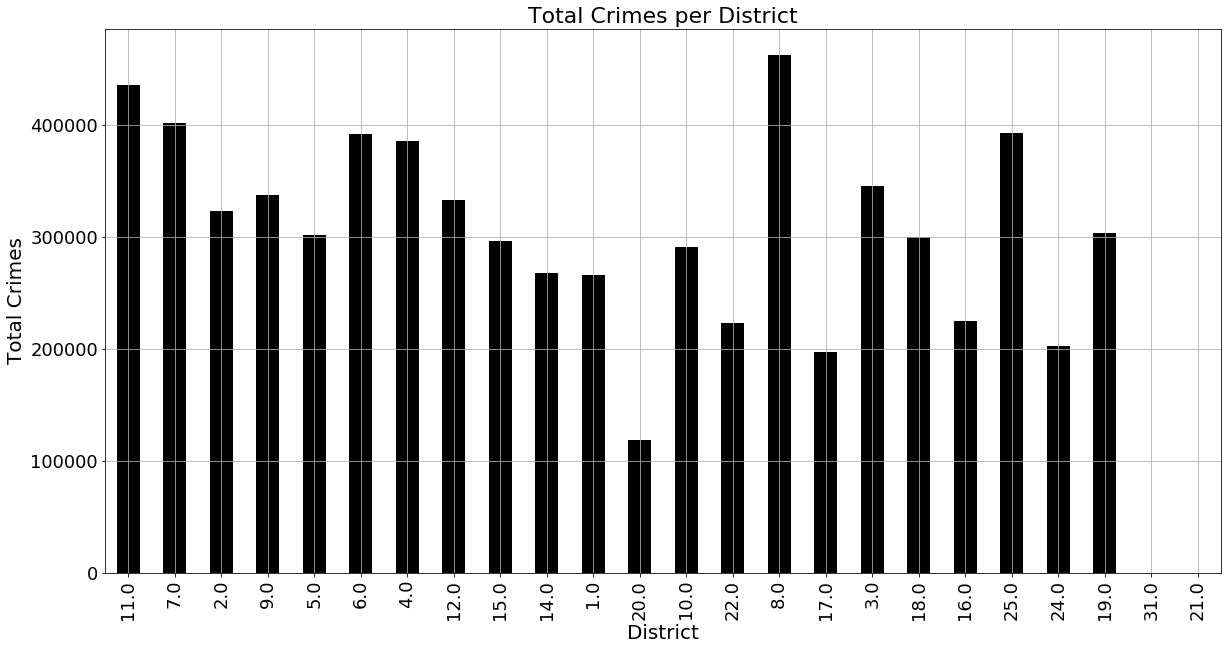

In [107]:
DTCchart = districtsTotalCrime.plot(kind='bar', grid=True, figsize=(20,10), legend=False, color='k')
DTCchart.set_title('Total Crimes per District', fontsize=22)
DTCchart.set_xlabel('District', fontsize=20)
DTCchart.set_ylabel('Total Crimes', fontsize=20)
DTCchart.tick_params(labelsize=18)
DTCchart

From the bar chart above, we can see that Districts 8 and 3 have the highest number of crime reports while districts 20 and 24 have the least. But our research question revolves around arrests so let's get a graph with the ratios of arrests per crime report in each district. Therefore, we would actually be able to see and compare the percentage of crimes that lead to an arrest because while a district might have more crimes, they might not have as many arrests as another district with less crime reports.  

In [108]:
districtsRatio = pd.DataFrame.from_dict(ratio_cache, orient='index')
districtsRatio.columns = ['Arrest to Crime Ratio']
districtsRatio.index.name = 'District Number'
districtsRatio.head()

,Arrest to Crime Ratio
District Number,
11.0,0.434659
7.0,0.290479
2.0,0.282046
9.0,0.292337
5.0,0.263953


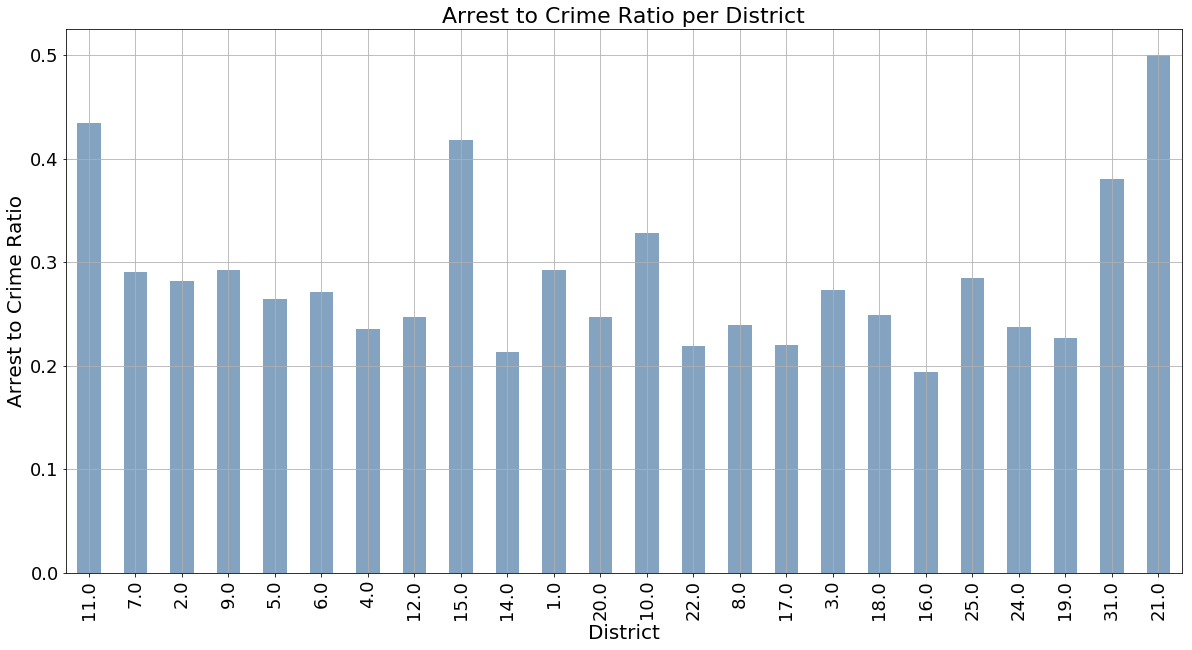

In [109]:
ratioChart = districtsRatio.plot(kind='bar', grid=True, figsize=(20,10), legend=False, color=(0.2, 0.4, 0.6, 0.6))
ratioChart.set_title('Arrest to Crime Ratio per District', fontsize=22)
ratioChart.set_xlabel('District', fontsize=20)
ratioChart.set_ylabel('Arrest to Crime Ratio', fontsize=20)
ratioChart.tick_params(labelsize=18)
ratioChart

As we suspected, this bar graph shows that the highest crime reported districts are different from the the highest arrest ratio districts. For example, we can see that the two districts with the highest arrest to crime ratio are Districts 15 and 11 while the two districts with the highest reported crimes (shown in the previous graph) were Districts 8 and 3.

With this new found info, let's finish out our Data Visualization section by focusing in on the top 3 Crime types (Theft, Battery, and Narcotics) and ploting their arrest to report ratio in each district to compare and utilize in our later Data Analysis section. 

To do this, we basically got the number of reports for each crime, the number of arrests made for each crime, and divided the number of arrests over the number of reports to get the final ratio. We ended up doing this for each district, which allowed us to create 3 separate bar graphs to visualize our data.

In [110]:
crime['Primary Type'].value_counts().nlargest(3)

THEFT              1431610
BATTERY            1241943
CRIMINAL DAMAGE     776791
Name: Primary Type, dtype: int64

In [111]:
dist_pred_arrest = pd.DataFrame()
for district in districts:
    arrest_occurred = crime[crime['Arrest'] == True]   
    
    dist_pred_arrest.loc[district, 'Reported Theft'] = len(crime[(crime['Primary Type'] == 'THEFT') & (crime['District'] == district)]) 
    dist_pred_arrest.loc[district,'Theft w/ Arrest Made'] = len(arrest_occurred[(arrest_occurred['Primary Type'] == 'THEFT') & (arrest_occurred['District'] == district)])
    dist_pred_arrest.loc[district,'Theft Arrest Rate'] = dist_pred_arrest.loc[district,'Theft w/ Arrest Made'] / dist_pred_arrest.loc[district,'Reported Theft']
    
    dist_pred_arrest.loc[district, 'Reported Battery'] = len(crime[(crime['Primary Type'] == 'BATTERY') & (crime['District'] == district)]) 
    dist_pred_arrest.loc[district,'Battery w/ Arrest Made'] = len(arrest_occurred[(arrest_occurred['Primary Type'] == 'BATTERY') & (arrest_occurred['District'] == district)])
    dist_pred_arrest.loc[district,'Battery Arrest Rate'] = dist_pred_arrest.loc[district,'Battery w/ Arrest Made'] / dist_pred_arrest.loc[district,'Reported Battery']
    
    dist_pred_arrest.loc[district, 'Reported Narcotics'] = len(crime[(crime['Primary Type'] == 'NARCOTICS') & (crime['District'] == district)]) 
    dist_pred_arrest.loc[district,'Narcotics w/ Arrest Made'] = len(arrest_occurred[(arrest_occurred['Primary Type'] == 'NARCOTICS') & (arrest_occurred['District'] == district)])
    dist_pred_arrest.loc[district,'Narcotics Arrest Rate'] = dist_pred_arrest.loc[district,'Narcotics w/ Arrest Made'] / dist_pred_arrest.loc[district,'Reported Narcotics']
print(dist_pred_arrest)

      Reported Theft  Theft w/ Arrest Made  Theft Arrest Rate  \
11.0         49428.0                4815.0           0.097414   
7.0          53662.0                4489.0           0.083653   
2.0          63662.0                7635.0           0.119930   
9.0          60667.0                8157.0           0.134455   
5.0          41843.0                3813.0           0.091126   
6.0          68956.0               11746.0           0.170341   
4.0          62682.0                5837.0           0.093121   
12.0         94488.0                8693.0           0.092001   
15.0         32080.0                2871.0           0.089495   
14.0         75868.0                5926.0           0.078109   
1.0         117639.0               20492.0           0.174194   
20.0         30158.0                4014.0           0.133099   
10.0         43303.0                4041.0           0.093319   
22.0         43541.0                3920.0           0.090030   
8.0          90918.0     

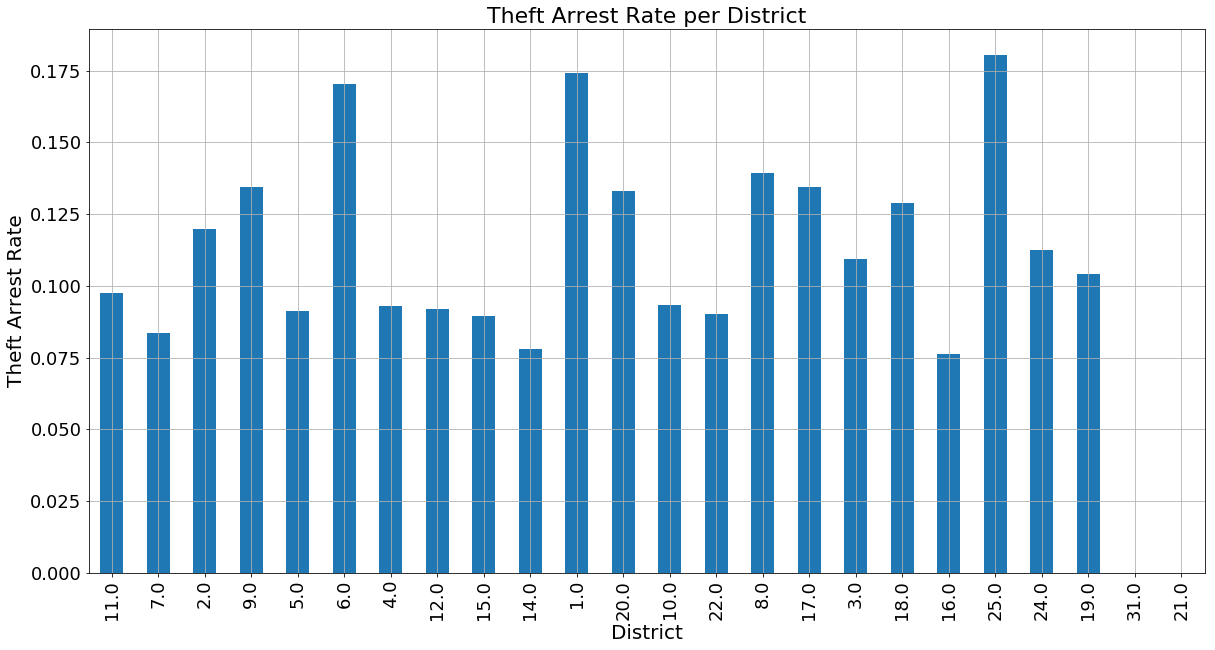

In [112]:
thefts = dist_pred_arrest['Theft Arrest Rate'] 
theftRate = thefts.plot(kind='bar', grid=True, figsize=(20,10), legend=False, color='tab:blue') 
theftRate.set_title('Theft Arrest Rate per District', fontsize=22)
theftRate.set_xlabel('District', fontsize=20)
theftRate.set_ylabel('Theft Arrest Rate', fontsize=20)
theftRate.tick_params(labelsize=18)
theftRate

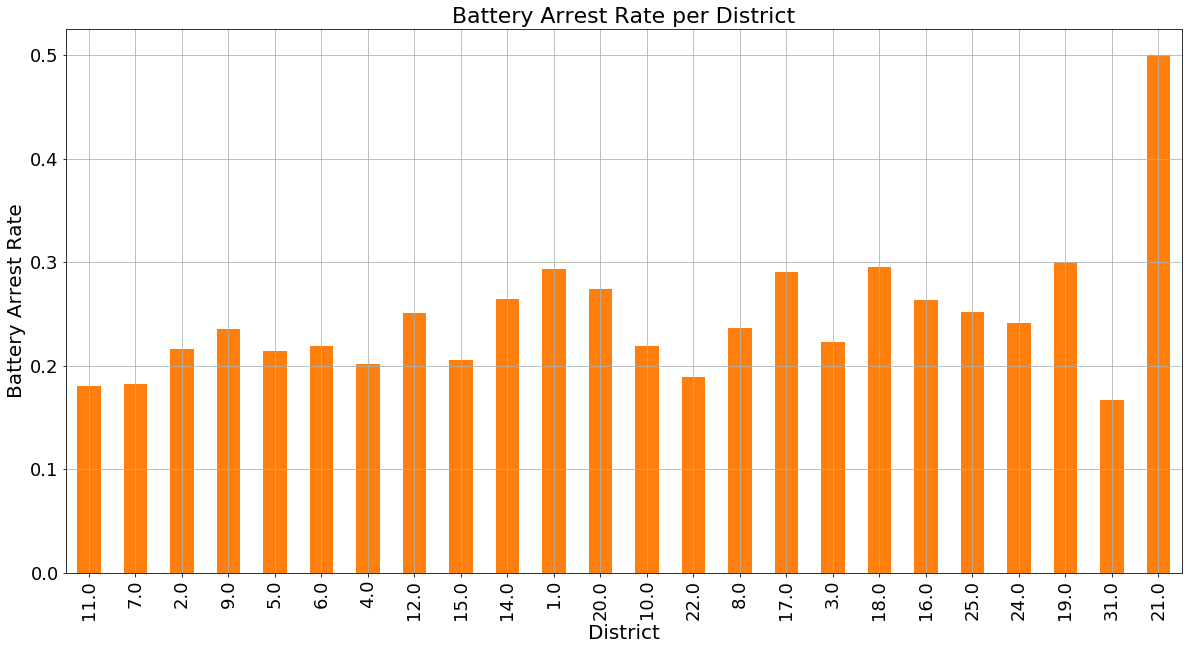

In [113]:
battery = dist_pred_arrest['Battery Arrest Rate'] 
batteryRate = battery.plot(kind='bar', grid=True, figsize=(20,10), legend=False, color='tab:orange') 
batteryRate.set_title('Battery Arrest Rate per District', fontsize=22)
batteryRate.set_xlabel('District', fontsize=20)
batteryRate.set_ylabel('Battery Arrest Rate', fontsize=20)
batteryRate.tick_params(labelsize=18)
batteryRate

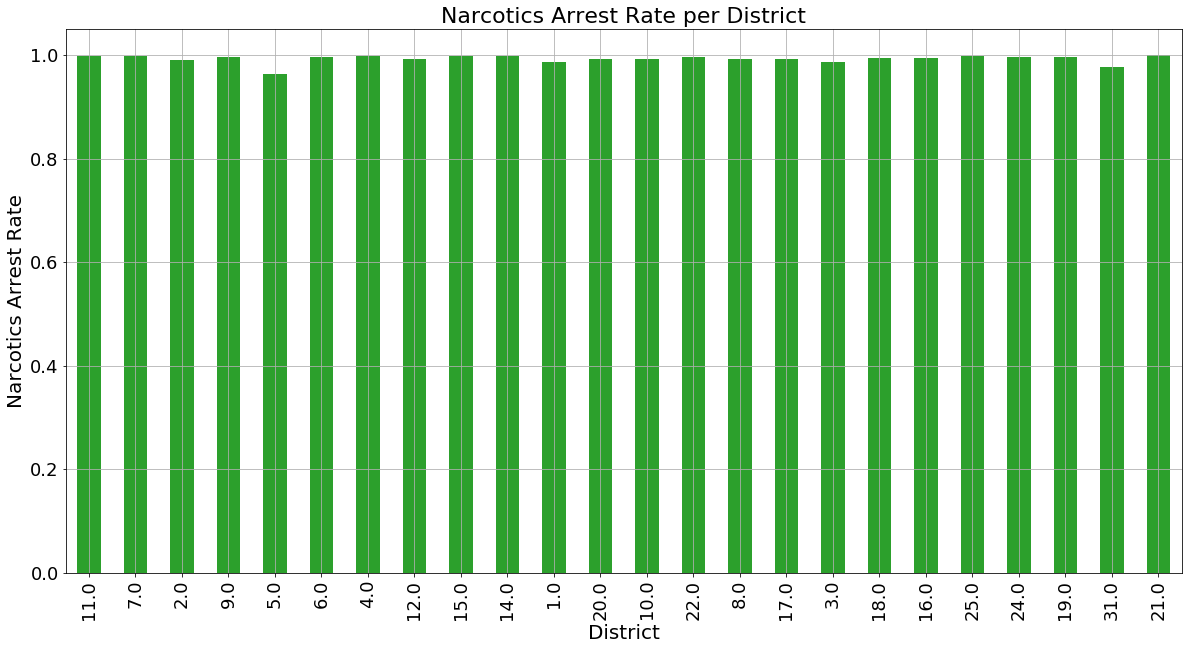

In [114]:
narcotics = dist_pred_arrest['Narcotics Arrest Rate'] 
narcoticsRate = narcotics.plot(kind='bar', grid=True, figsize=(20,10), legend=False, color='tab:green') 
narcoticsRate.set_title('Narcotics Arrest Rate per District', fontsize=22)
narcoticsRate.set_xlabel('District', fontsize=20)
narcoticsRate.set_ylabel('Narcotics Arrest Rate', fontsize=20)
narcoticsRate.tick_params(labelsize=18)
narcoticsRate

From these three graphs, we can see how Theft anad Battery arrest ratios vary from district to district, while Narcotics arrest ratios seem to be fairly similar (and quite high) across the districts. Let's now jump into using this data to build a model and come up with an analysis that answers our research question.

# Part 5 - Data Analysis and Results

Our research questions is whether an arrest was made from a reported crime is better predicted by the type of crime commmited or the district the crime is committed.

Because the dependent variable, Arrest is a true or false value, we first converted it to a 1 or a 0, with 1 for true and 0 for false.

Because Arrest is binary, we chose a Binomial regression as our data model. Binomial regression/Logistic regression is useful when a dependent variable is binary because it doesn't attempt to fit a line to the data, it produces a curve that represents the chance that an input would results in a true or a false value.

In [ ]:
binomial_model = smf.glm(formula='Arrest ~ Type + District', data=crime,family=sm.families.Binomial())
binomial_results = binomial_model.fit()
binomial_results.summary()

## Preliminary Analysis

The intercept of the model is an arson committed in district 1. We found this by noticing that district 1 is the only district not included in the summary, and arson is the only crime type not included in the summary. 

A higher coefficient in the table above indicates that the associated variable (district or type) is more likely to result in an arrest. A lower coefficient indicates the opposite.

Additionally, we use the common alpha level of 0.05 to determine whether a variable is significant. Any variable with p-value greater than 0.05 is considered significant, and any variable with a p-value less than 0.05 is considered significant.

Looking at the above table, we can see that in general, the crime type is more significant than the district. The range of district coefficients is (x,y), while the range of the crime type is much higher, (x,y)

Also make notes about how districts considered to be 'bad' e.g. the southside, tend to have a greater coefficients, indicating that you are more likely to get arrested in those districts, but only slightly.

Also talk about how lots of people think police target specific districts. while our analysis show that this might be true, the coefficients are so small that we wouldn't consider it a major issue.

## Looking at the top three crimes

We want to look at the top three crimes overall, because this might give us a more generalized picture of what overall crime looks like in Chicago

In [88]:
crime['Type'].value_counts().nlargest(3)

battery      418
theft        383
narcotics    266
Name: Type, dtype: int64

In [89]:
top_crime = crime[(crime['Type'] == 'theft') | (crime['Type'] == 'battery') | (crime['Type'] == 'narcotics')]

In [90]:
binomial_model = smf.glm(formula='Arrest ~ Type + District', data=top_crime,family=sm.families.Binomial())
binomial_results = binomial_model.fit()
binomial_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Arrest   No. Observations:                 1067
Model:                            GLM   Df Residuals:                     1043
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -377.24
Date:                Mon, 18 Mar 2019   Deviance:                       754.47
Time:                        14:46:55   Pearson chi2:                     803.
No. Iterations:                    24   Covariance Type:             nonrobust
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.2485      0.429     -0.579      0.563      -1.089       0.592
Type[T.narcotics]    26.8171   1.29e+04      0.002      0.998   -2.53e+04    2.53e+04
Type[T.theft]        -0.9436      0.206     -4.592      0.000      -1.346      -0.541
District[T.10]       -1.3465      0.637     -2.114      0.035      -2.595      -0.098
District[T.11]       -1.9660      0.668     -2.941      0.003      -3.276      -0.656
District[T.12]       -1.2255      0.675     -1.815      0.070      -2.549       0.098
District[T.14]       -1.0637      0.601     -1.769      0.077      -2.242       0.115
District[T.15]       -0.6251      0.636     -0.982      0.326      -1.872       0.622
District[T.16]       -0.7325      0.665     -1.102      0.271      -2.036       0.571
District[T.17]       -0.6759      0.619     -1.092      0.275      -1.889       0.538
District[T.18]        0.3294      0.495      0.665      0.506      -0.641       1.300
District[T.19]       -0.7990      0.683     -1.170      0.242      -2.137       0.539
District[T.2]        -0.5838      0.565     -1.034      0.301      -1.691       0.523
District[T.20]       -1.6685      1.122     -1.487      0.137      -3.867       0.530
District[T.22]       -1.2011      0.677     -1.775      0.076      -2.528       0.125
District[T.24]       -0.6796      0.651     -1.044      0.297      -1.956       0.597
District[T.25]       -0.3299      0.511     -0.645      0.519      -1.332       0.672
District[T.3]        -0.3420      0.530     -0.645      0.519      -1.381       0.697
District[T.4]        -1.0197      0.553     -1.844      0.065      -2.104       0.064
District[T.5]        -0.9369      0.569     -1.646      0.100      -2.052       0.179
District[T.6]        -0.2488      0.549     -0.453      0.651      -1.326       0.828
District[T.7]        -1.6888      0.626     -2.698      0.007      -2.915      -0.462
District[T.8]        -0.6599      0.541     -1.220      0.222      -1.720       0.400
District[T.9]        -0.5029      0.606     -0.830      0.406      -1.690       0.684
=====================================================================================
"""

## Analysis Conclusions

Overall, because the average crime type coefficient was larger than the average district coefficient, the type of crime tends to 

# Part 6 - Privacy/Ethics Considerations

##### Privacy
For the purpose of our analysis, we do have permission to use this dataset becauset the police department released as public record. The data is also fairly private because there is no individual person identifying information. There are no names, only crime ids and description. The only identifying information is the location (partial addresses and longitude/latitude). This could be an issue because some of the crimes occurred in apartments, so you could conceivably find out the location where a crime was committed and use this to find someone. However, for our project purposes, we decided to use district # instead so we simply dropped those other location identifying sections from our data to further perserve the privacy of those involved when we release our findings.

##### Ethics
A potential ethics considerations involving this data is that we are publicizing the locations of high crime, which could be used to discriminate against communities. While this data is publicily available, we are organizing and formatting it in a way that can be used to show which districts have a high crime rate. People with ill intentions could use this to argue that no one should go near these areas, alientating those communities. 

# Part 7 - Conclusions and Discussion

##### Potential Biases
We realize that there are some potential biases in our dataset, because while this data was collected by the police department, there are a lot of crimes that happen where those involved do not go to or report to the police. Unfortunately these instances/crimes would be omitted from the data, which could skew the data to lean towards one or more areas unfairly.

##### Potential Incorrect Data
It's important to note that our data represents reported crimes. We operated with the assumption that no crimes are reported falsely. This was a reasonable assumption on our part because we assumed that the number of real crimes reported is much higher than the number of crimes reported falsely. This does introduce a possible counfounding variable into our dataset, but it was not feasible to account for this in a reasonable amount of time.